In [1]:
#step 1: Define the objective ofthe problem statement
# create classification model which can classify the flower
# species based on the input provided SL,SW,PL,PW
# step 2 : Data gathering 

In [28]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# read data set
df=pd.read_csv("D:/DSCT/Dataset/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
profile=ProfileReport(df,'Iris data set')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

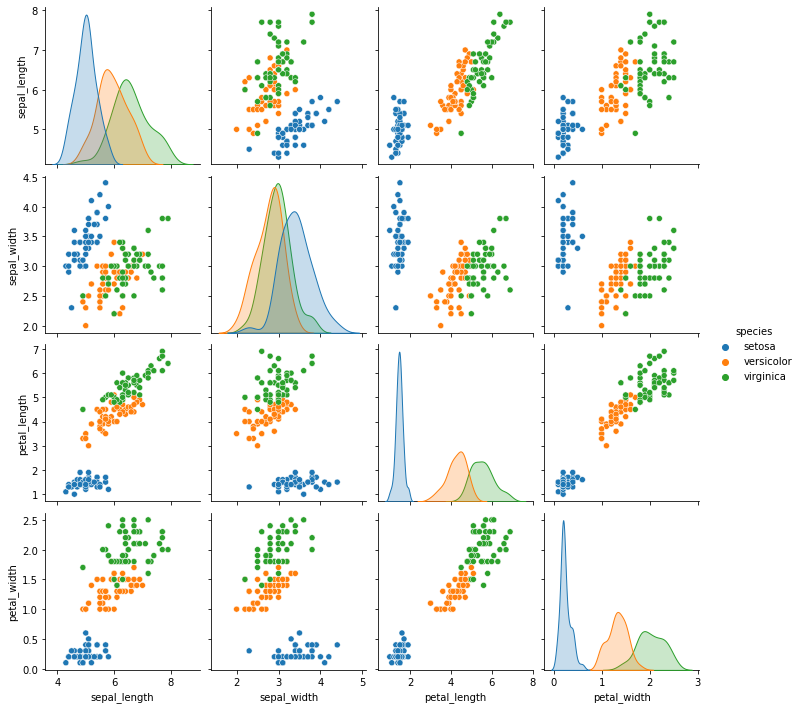

In [7]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

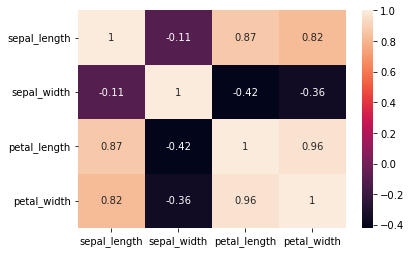

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
# split data into X and y

In [10]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [15]:
# split the data into traning

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [16]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (105, 4)
X_test:- (45, 4)
y_train:- (105,)
y_test:- (45,)


# Step 5:Building a machine learning model

In [20]:
# logisticRegression

ML_Model=LogisticRegression(solver='lbfgs', max_iter=1000)
print("model created")

# traning
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")


model created
model trained
y_pred completed


accuracy:-  97.77777777777777
Error rate:- 0.022222222222222254
Precision:- 0.9792592592592592
Recall:- 0.9777777777777777
f1:- 0.9777493969064851
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


Text(33.0, 0.5, 'Actual')

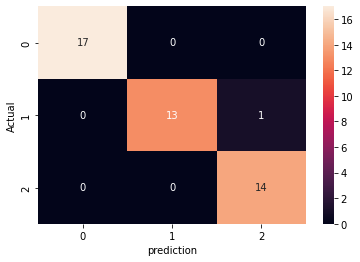

In [29]:
# model evaluation
acc=accuracy_score(y_test,y_pred)
print("accuracy:- ",acc*100)
print("Error rate:-",1-acc)
print('Precision:-',precision_score(y_test,y_pred,average='weighted'))
print("Recall:-",recall_score(y_test,y_pred,average="weighted"))
print("f1:-",f1_score(y_test,y_pred,average="weighted"))

lab=['setosa', 'versicolor', 'virginica']
print(classification_report(y_test,y_pred,target_names=lab))
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Actual")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# prediction

In [30]:
SL=6.3
SW=2.5
PL=5.0
PW=1.9

In [32]:
pred=ML_Model.predict([[SL,SW,PL,PW]])[0]
print("for SL={},SW={},PL={},PW={} flower species is {}".format(SL,SW,PL,PW,pred))

for SL=6.3,SW=2.5,PL=5.0,PW=1.9 flower species is virginica


C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
